
# <b> Electrical Grid Stability Simulated Data</b>
The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.

Link to dataset - https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data

### Attribute Information

There are 11 predictive attributes, 1 non-predictive attribute (p1), and 2 goal fields in the dataset. Here is a description of each attribute:

1. tau[x]: This attribute represents the reaction time of the participant. It is a real value ranging from 0.5 to 10 seconds. Tau1 specifically pertains to the reaction time of the electricity producer.

2. p[x]: This attribute indicates the nominal power consumed (if negative) or produced (if positive). It is a real value within the range of -0.5 to -2 seconds^-2. The value of p1 is the absolute sum of p2, p3, and p4.

3. g[x]: This attribute represents a coefficient (gamma) that is proportional to price elasticity. It is a real value ranging from 0.05 to 1 seconds^-1. The value of g1 corresponds to the coefficient for the electricity producer.

4. stab: This attribute denotes the maximal real part of the characteristic equation root. If the value is positive, it indicates that the system is linearly unstable. It is a real value.

5. stabf: This attribute is the stability label of the system and is categorical, having two values: "stable" and "unstable". It indicates the stability status of the system.

These attributes provide information about the reaction time, power consumption/production, price elasticity, and stability characteristics of the system under study.

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, auc, make_scorer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


Observations

The dataset consists of 10,000 samples with 13 features. The summary statistics obtained from the `describe()` function reveal valuable insights into the data. The mean values for the `tau1`, `tau2`, `tau3`, and `tau4` features are observed to be very close, indicating a relatively balanced distribution. Similarly, the mean values for the `p1`, `p2`, `p3`, and `p4` features are also very close. The standard deviations for all the features vary, with the `stab` feature having the highest value of 0.036919. The minimum and maximum values for the features vary across different ranges, with the `stab` feature having a minimum value of -0.080760 and a maximum value of 0.109403. From the 25th percentile to the 75th percentile, the interquartile range for each feature is observed to be relatively small. Overall, the statistical summary of the dataset provides essential information on the range, central tendency, and variability of the features, which can guide further analysis and modeling in the research project.

In [6]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

- There are no null values in the data

In [7]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).

    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.

    Keyword arguments:

    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None

    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))

    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)

    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()



In [8]:

def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.

    Keyword arguments:

    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()

    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                    center=0, annot=True, annot_kws={"size": 8}, cmap="PRGn")
    plt.show()

In [9]:

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

In [10]:
for column in data.columns:
    assessment(data, 'stab', column, -1)

Output hidden; open in https://colab.research.google.com to view.

- It can observed that most of the features are normally distributed except P1 and stab which seem t have normal distribution and the feature stabf which has two classes and seem to be slightly imbalanced

In [11]:
data.p1.skew()

-0.012690009637859039

### Correlation plot

It is crucial to examine the relationships between numerical features and the dependent variable, as well as potential collinearity among these features. The heatmap analysis presented below offers valuable insights into the correlations between the dependent variable, denoted as 'stabf', and the 12 numerical features. It is worth mentioning that the alternative dependent variable, labeled as 'stab', has been included to provide an indication of its correlation with 'stabf'. The observed correlation between 'stab' and 'stabf' is significant, measuring -0.83, which supports the prior decision to exclude 'stab' as anticipated in Section 3. Additionally, it is noted that the correlation between 'p1' and its components 'p2', 'p3', and 'p4' is higher than the average correlation but not substantial enough to warrant their removal.

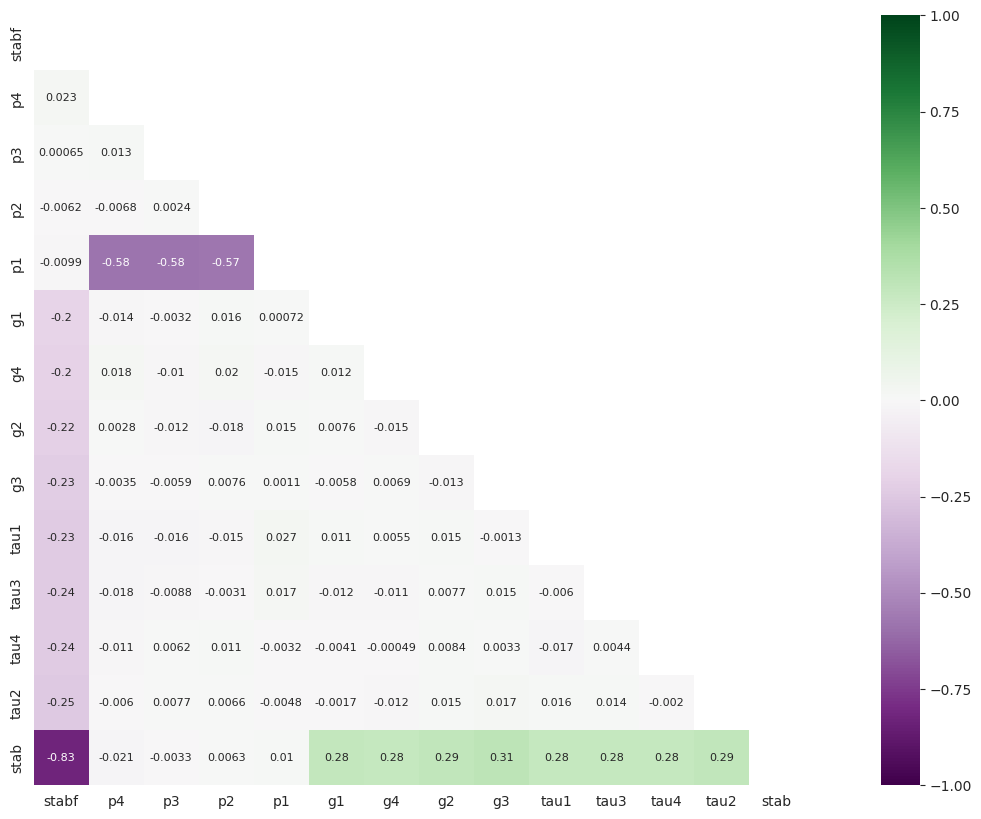

In [12]:
correlation_map(data, 'stabf', 14)

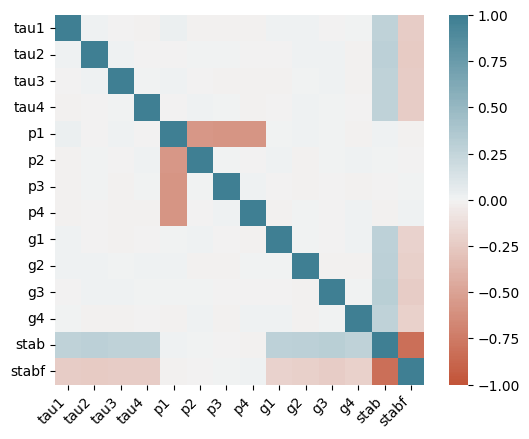

In [13]:
corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


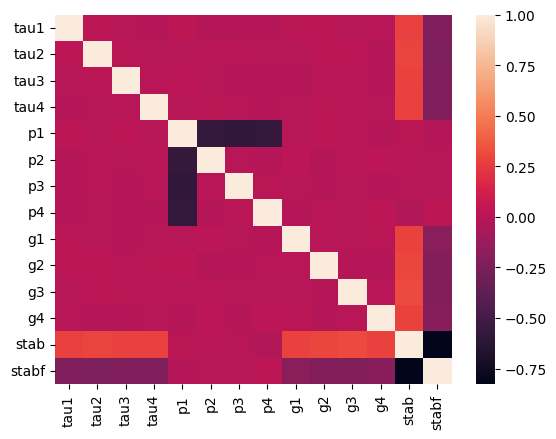

In [14]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [24]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=21728d0fa3e4cc7b4e2896a4a85b92300e67310b1ff27a2d26f9b72c1a5a9593
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
  Attempting uninstall: holoviews
  

In [25]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=data,depVar='stab',verbose=1,max_rows_analyzed=data.shape[0]
               ,max_cols_analyzed=data.shape[1])

Output hidden; open in https://colab.research.google.com to view.

In [15]:
# Univariate Analysis
# Histogram for each feature
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [16]:

# Bivariate Analysis
# Pairplot of numerical features
numerical_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
sns.pairplot(data[numerical_features], diag_kind='kde')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

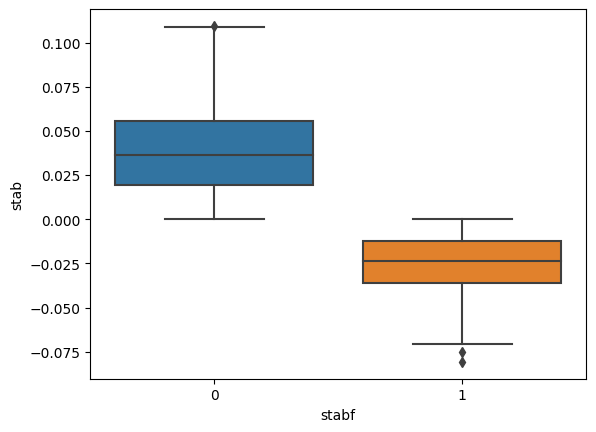

In [17]:

# Boxplot of target feature 'stab'
sns.boxplot(x='stabf', y='stab', data=data)
plt.show()


In [73]:
data[numerical_features + ['stab']].corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


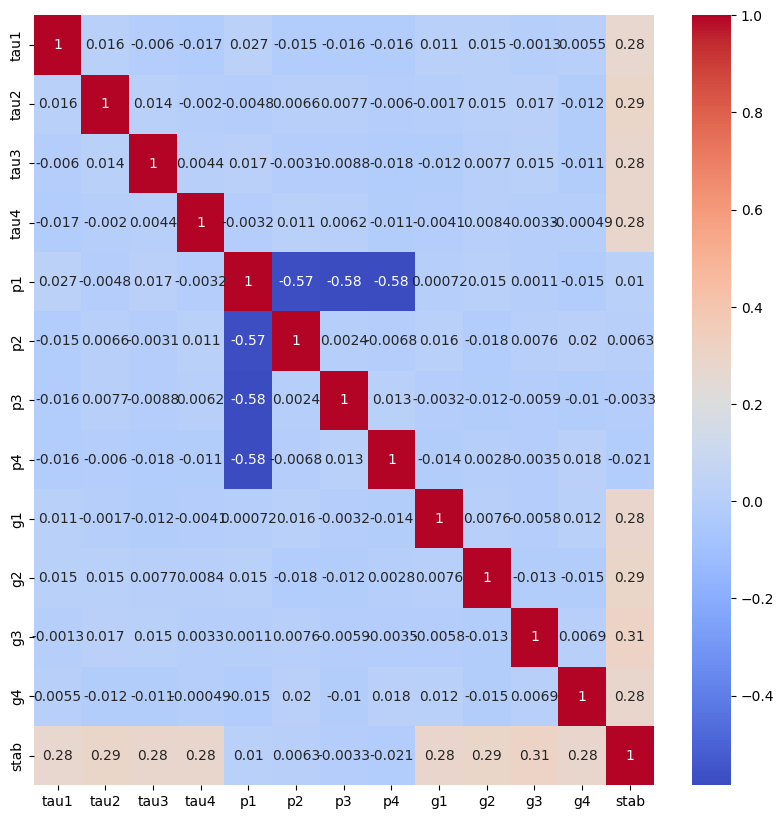

In [27]:

# Correlation heatmap
correlation_matrix = data[numerical_features + ['stab']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


It is observed that the correlation matrix provides insights into the relationships between different variables in the dataset. Each value in the matrix represents the correlation coefficient between two variables, ranging from -1 to 1.

Analyzing the provided correlation matrix, the following observations can be made:

- The diagonal elements represent the correlation of each variable with itself, which is always 1. For example, `tau1` has a perfect positive correlation of 1 with itself.
- The off-diagonal elements indicate the correlation between pairs of variables. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 suggest a weak or no correlation.
- Some notable observations:
  - The `stab` variable shows moderate positive correlations with several other variables, including `tau1`, `tau2`, `tau3`, and `tau4`. This suggests that there is a relationship between these variables and the stability of the system.
  - The `p1` variable has a negative correlation with `p2`, `p3`, and `p4`, indicating some level of negative association between these pressure variables.
  - The `g3` variable shows a moderate positive correlation with `g2` and `stab`, suggesting a relationship between these variables.

Overall, this correlation matrix provides valuable insights into the interdependencies and associations among the variables in the dataset. These observations can guide further analysis and modeling in the research project.

In [74]:
data.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761,-0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975,-0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700,-0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576,-0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278,-0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255,-0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321,0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786,0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774,-0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601,-0.217341


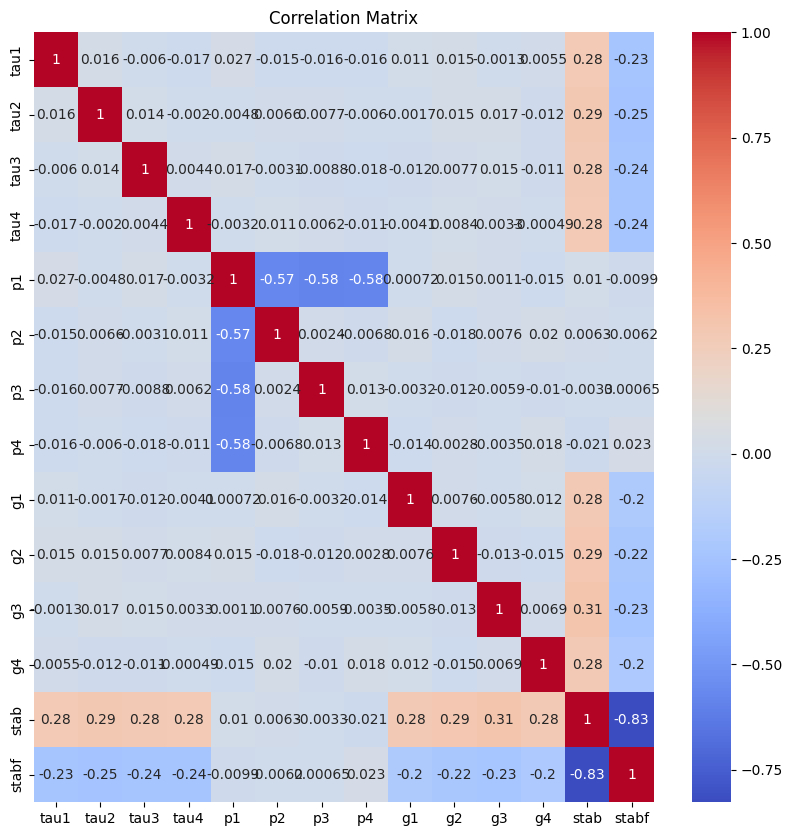

In [28]:

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlation matrix shows the pairwise correlations between different features in the dataset. Each cell in the matrix represents the correlation coefficient between two features. Here are the observations:

1. Correlation between Features:
   - The features tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, and g4 show a relatively low correlation with each other, as indicated by their correlation coefficients close to zero. This suggests that these features are not strongly linearly related to each other.

   - The feature stab (stability) exhibits moderate positive correlations with tau1, tau2, tau3, tau4, g1, g2, g3, and g4, as indicated by their positive correlation coefficients. This suggests that there is some positive linear relationship between stability and these features.

   - The feature stabf (stability flag) shows negative correlations with most of the features, including tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, and g4. This indicates that as these features increase, the stability flag tends to decrease, indicating a lower level of stability.

2. Impact on Stability:
   - The feature stab has the highest positive correlation with tau2, tau3, tau4, g1, g2, g3, and g4. This implies that changes in these features may have a greater impact on the stability of the system.

   - The feature stabf, which represents the stability flag, shows negative correlations with all the features. This suggests that the stability flag is affected by multiple factors present in the dataset.

It is observed that the stability of the system, as indicated by the feature stab, is influenced by several features such as tau1, tau2, tau3, tau4, g1, g2, g3, and g4. Additionally, the stability flag (stabf) shows negative correlations with most of the features, indicating their impact on determining the stability level. These observations provide insights into the relationships between the features and the stability of the system under study.

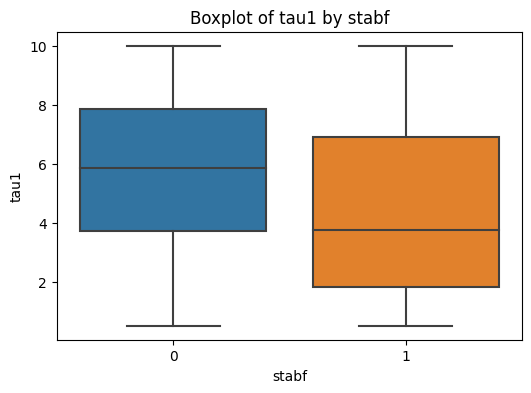

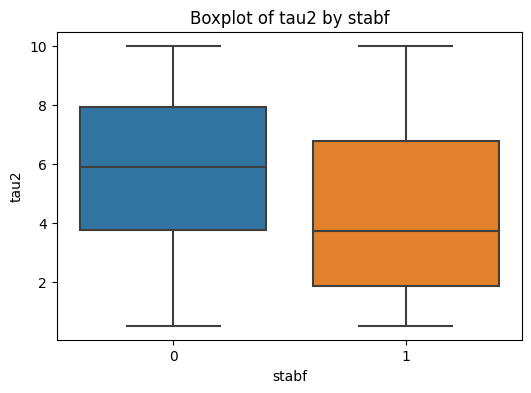

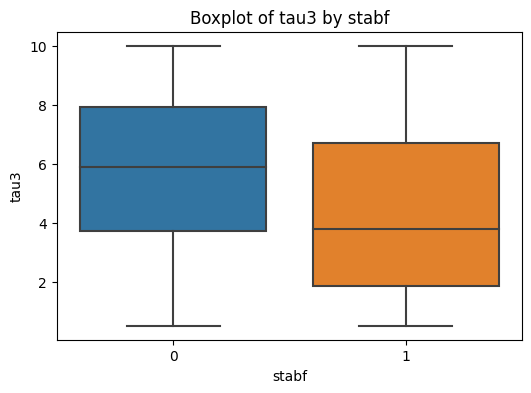

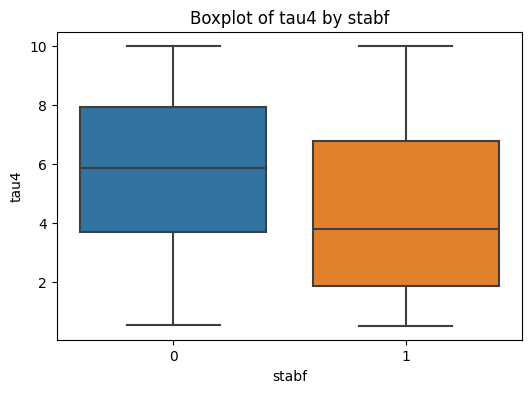

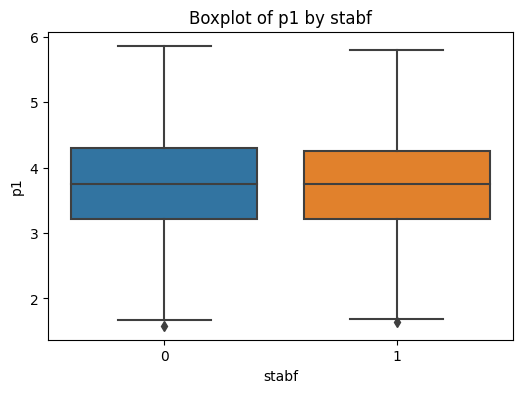

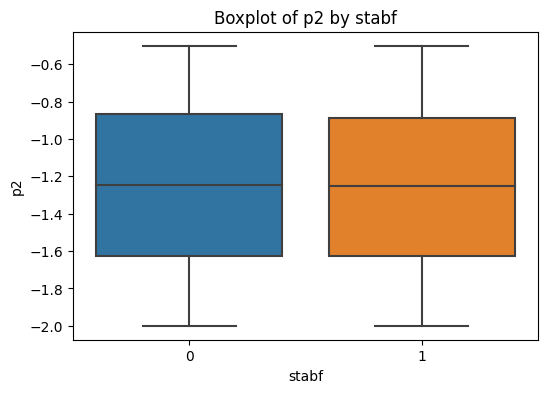

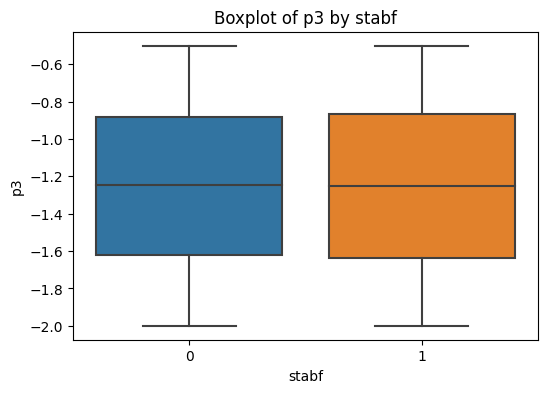

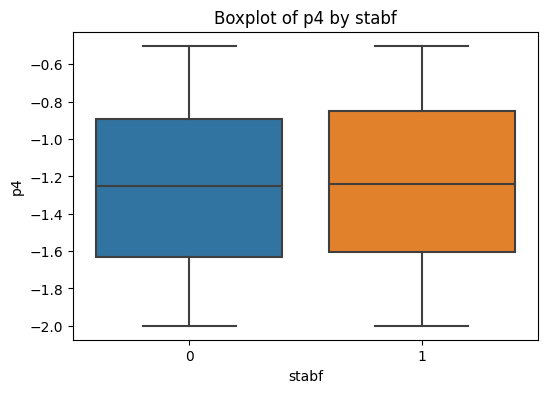

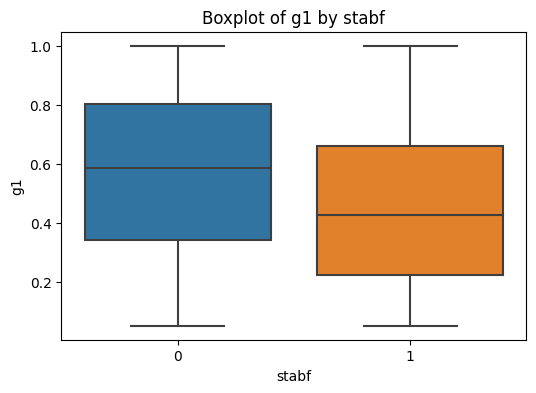

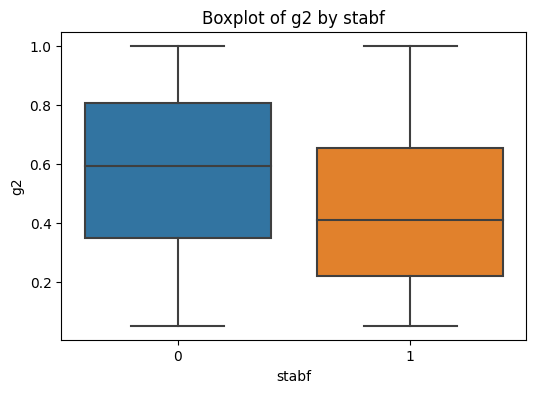

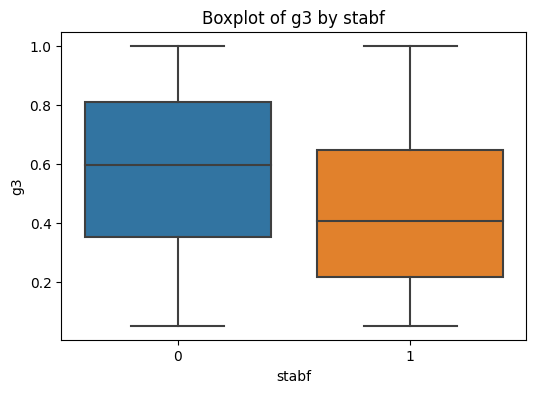

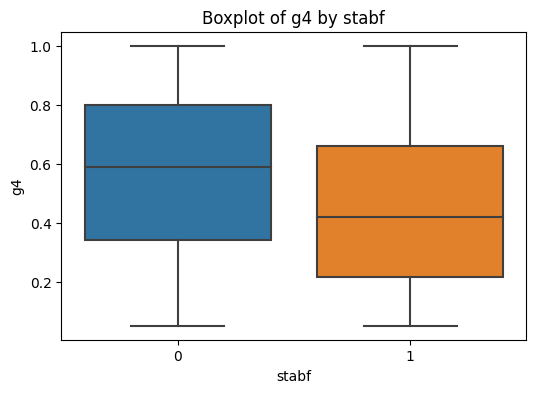

In [20]:

# Boxplot of numerical features by 'stabf'
numerical_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stabf', y=feature, data=data)
    plt.title(f"Boxplot of {feature} by stabf")
    plt.show()


From the boxplots, it can be observed that the tau features like tau1,tau2,tau3, and tau4 have higher values when the stabf is 0 or unstable and lower values at stability and the same can be observed for features like g1,g2 and g3. But the p1,p2,p3 and p4 features seem to have same mean values for both the classes.

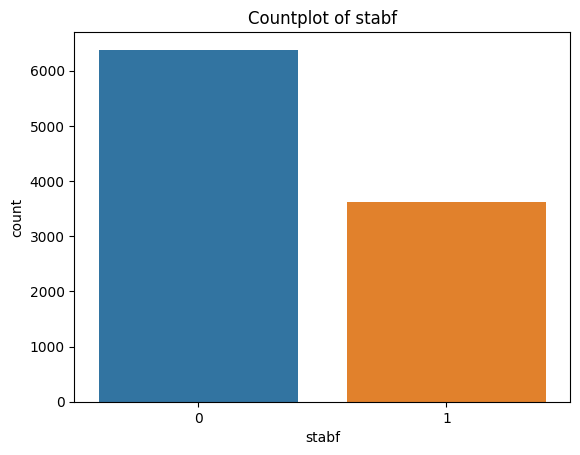

In [21]:
# Countplot of target feature 'stabf'
sns.countplot(x='stabf', data=data)
plt.title("Countplot of stabf")
plt.show()


From the above barplot, t can be observed that there are more instances of unstability than stability and this shows the presence of data imbalance too.

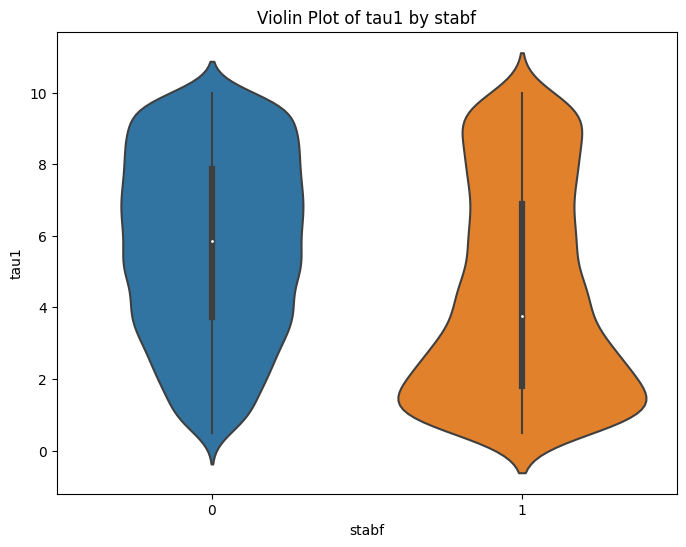

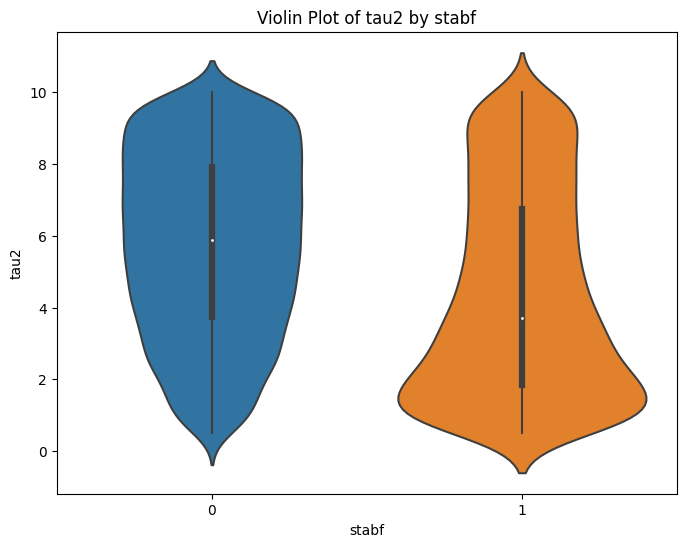

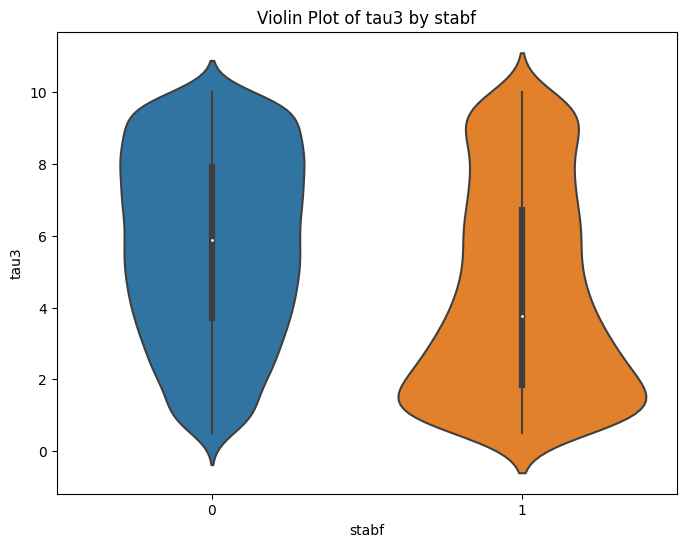

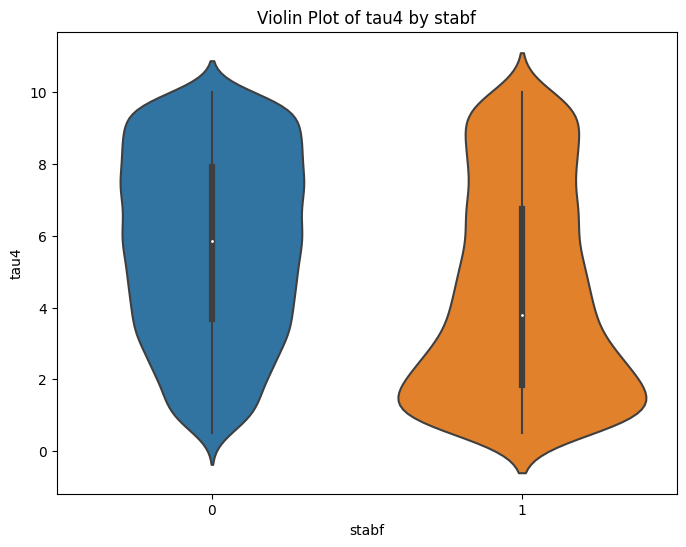

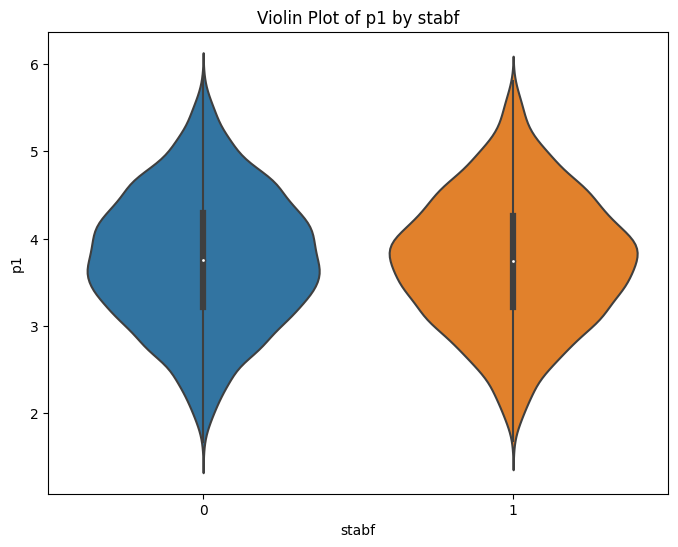

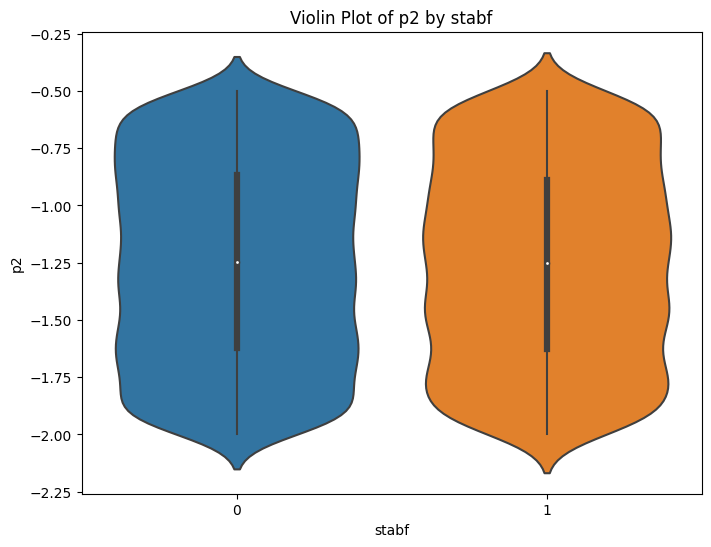

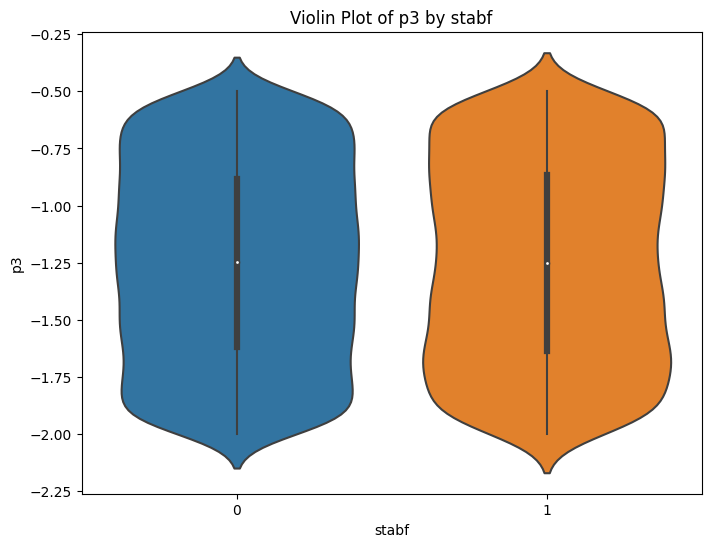

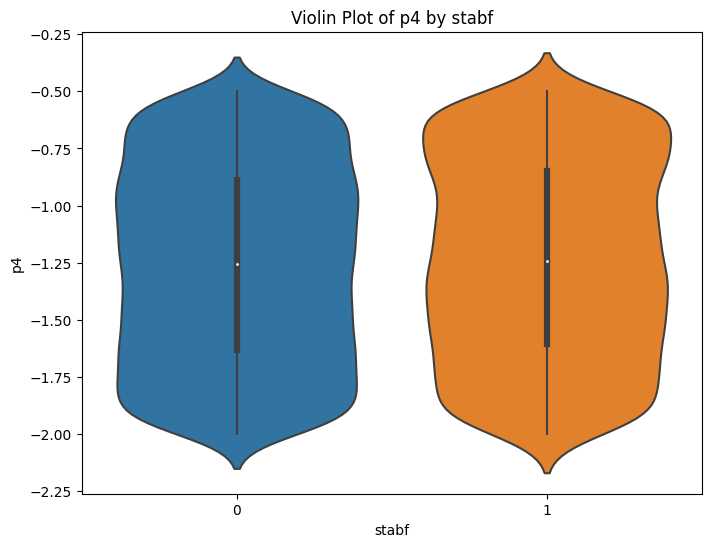

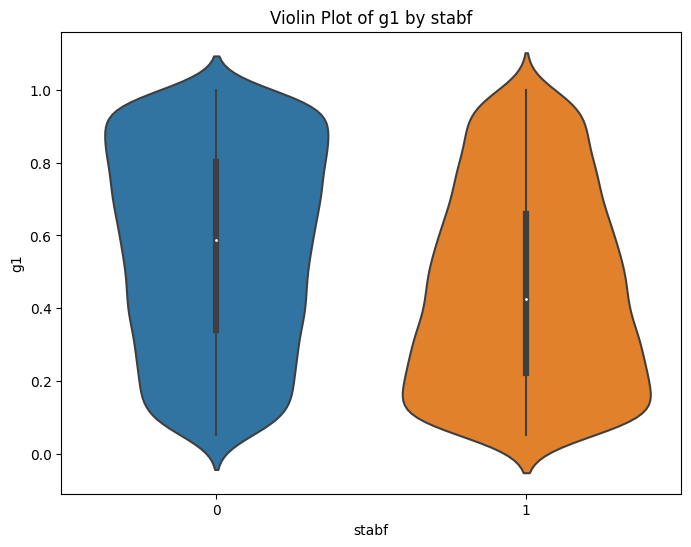

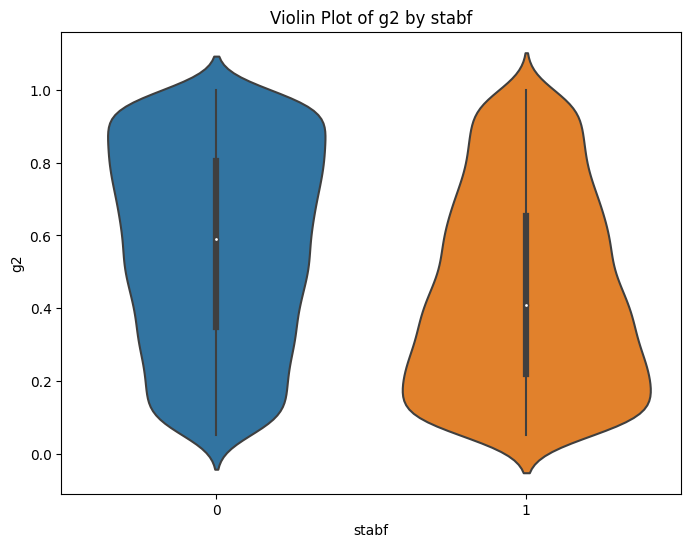

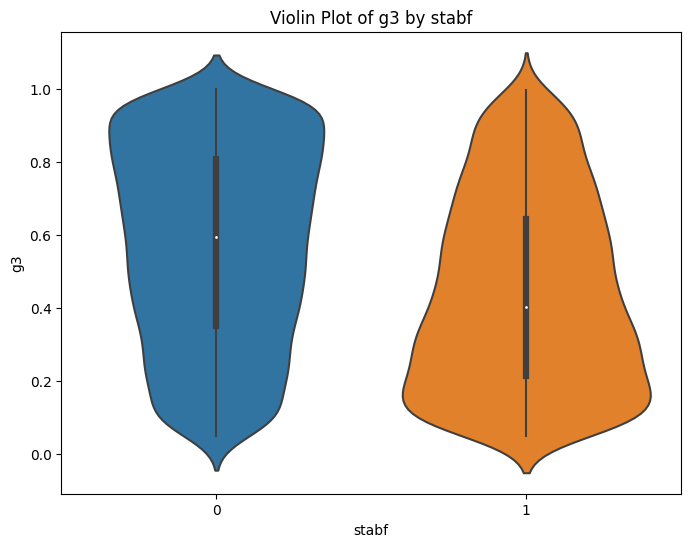

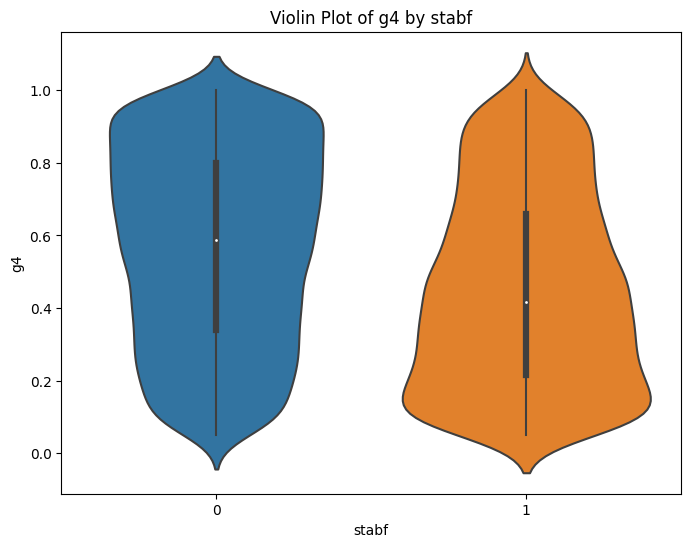

In [22]:
# Violin plot of numerical features by 'stabf'
numerical_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='stabf', y=feature, data=data)
    plt.title(f"Violin Plot of {feature} by stabf")
    plt.show()


In [23]:
# Pairplot with hue based on 'stabf'
sns.pairplot(data, hue='stabf', diag_kind='kde')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

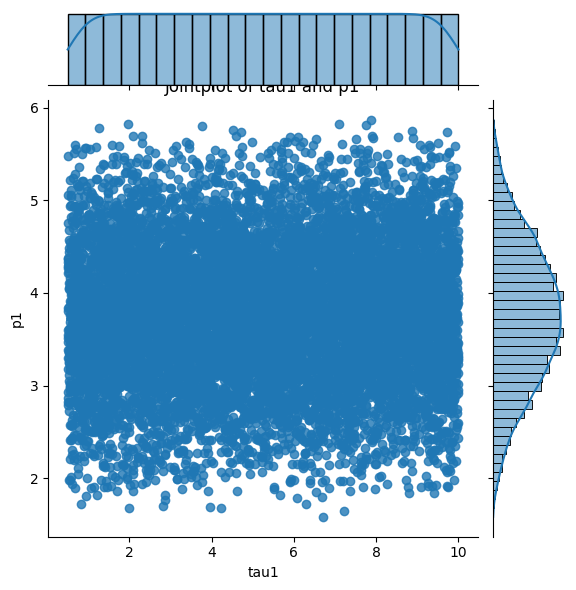

In [24]:
# Jointplot of two numerical features with regression line
sns.jointplot(x='tau1', y='p1', data=data, kind='reg')
plt.title("Jointplot of tau1 and p1")
plt.show()


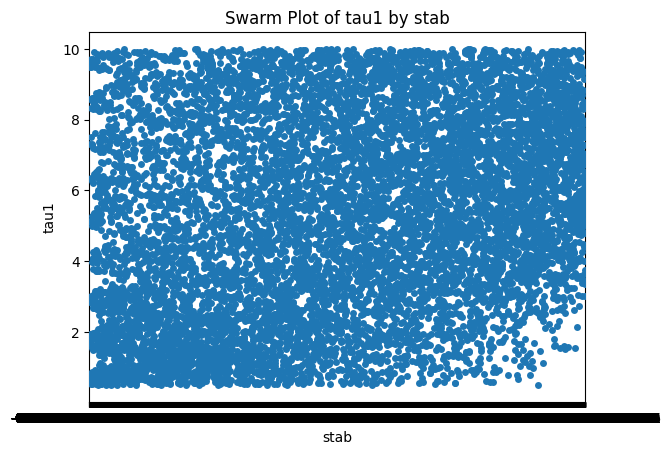

In [25]:
# Swarm plot of numerical feature against target 'stab'
sns.swarmplot(x='stab', y='tau1', data=data)
plt.title("Swarm Plot of tau1 by stab")
plt.show()


In [29]:
data.head(1)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
5147,8.761935,6.745495,1.048679,4.501876,4.114011,-1.266907,-1.386937,-1.460167,0.112503,0.421942,0.851273,0.684608,-0.01525,1


In [40]:
data.stabf.value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

In [30]:
X = data.drop('stabf', axis=1)
y = data['stabf']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 156)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((8000, 13), (8000,), (1000, 13), (1000,), (1000, 13), (1000,))

### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in data analysis and machine learning. PCA aims to transform a dataset consisting of potentially correlated variables into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original variables and capture the maximum variance in the data.

PCA is important in several ways. First, it helps in reducing the dimensionality of the data by identifying the most important features or components. This is particularly useful when dealing with high-dimensional datasets, as it can help simplify the analysis and visualization of the data. By reducing the number of dimensions, PCA can also help improve computational efficiency in subsequent machine learning algorithms.

Second, PCA helps in identifying the underlying structure or patterns in the data. The principal components are ordered in terms of their ability to explain the variance in the data. The first principal component accounts for the highest variance, followed by the second, and so on. By analyzing the weights or loadings of the variables in each principal component, it is possible to gain insights into the most influential factors contributing to the overall variance in the data.

Additionally, PCA can be used for data preprocessing and feature extraction. It can be applied to remove noise or redundant information in the data, enhance the signal-to-noise ratio, and improve the performance of subsequent machine learning algorithms. PCA is also useful for visualizing high-dimensional data in a lower-dimensional space, allowing for easier interpretation and understanding.

In conclusion, PCA is an important technique in data analysis and machine learning as it enables dimensionality reduction, identifies underlying patterns in the data, and aids in data preprocessing and feature extraction. It offers benefits such as improved computational efficiency, simplified analysis, and enhanced interpretability of complex datasets.

In [33]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(X)
x2d_df = pd.DataFrame(x2d)

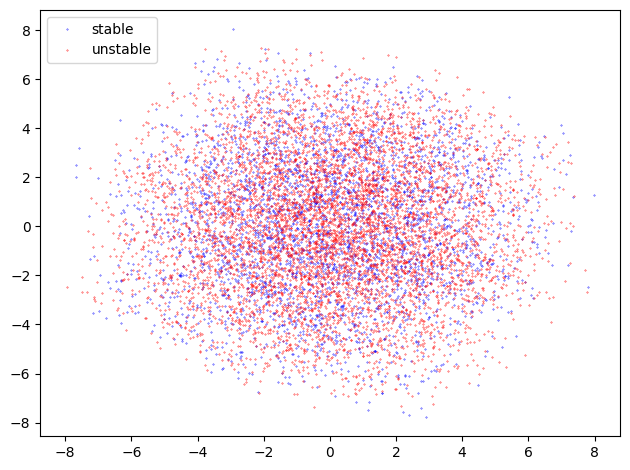

In [34]:
plt.plot(x2d_df[0][y==1], x2d_df[1][y==1], 'b.', ms=0.6, label='stable')
plt.plot(x2d_df[0][y==0], x2d_df[1][y==0], 'r.', ms=0.6, label='unstable')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

- It can be observed that interpretiing the data by only lowering the dimensions to 2 dimensions is difficult as they seem to be highly clustered and looks like some noise in the data

In [35]:
def draw_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, index=['unstable', 'stable'], columns=['unstable', 'stable'])
    cm_sns = sns.heatmap(cm, cmap="Blues", annot=True)
    cm_sns.set_xlabel('predicted')
    cm_sns.set_ylabel('actual')
    plt.show()

### Modelling

#### Models with the Orginal. Data

In [41]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Val-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores_val))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_test = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores_test))


Train-set Performance:

Logistic regression: 0.897875
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Val-set Performance:

Logistic regression: 0.887
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.9
Bagging: 0.999
Random forest: 0.999
GBM: 0.999
Adaboost: 0.999
dtree: 0.999


<b> Models with oversampled data

In [42]:
print("Before Oversampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train == 1)))
sm = SMOTE(
    sampling_strategy="auto", k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("Before Oversampling, counts of label '0': {}".format(sum(y_train_over == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train_over == 1)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '0': 5105
Before Oversampling, counts of label '1': 2895 

Before Oversampling, counts of label '0': 5105
Before Oversampling, counts of label '1': 5105 

After Oversampling, the shape of train_X: (10210, 13)
After Oversampling, the shape of train_y: (10210,) 



<b> Training all models on the oversampled data

In [44]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Val-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores_val))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.9107737512242899
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Val-set Performance:

Logistic regression: 0.887
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.904
Bagging: 0.999
Random forest: 0.999
GBM: 0.999
Adaboost: 0.999
dtree: 0.999


### Models with undersampling of data

In [45]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [46]:
print("Before Under Sampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Under Sampling, counts of label '1': {} \n".format(sum(y_train == 1)))

print("After Under Sampling, counts of label '0': {}".format(sum(y_train_un == 0)))
print("After Under Sampling, counts of label '1': {} \n".format(sum(y_train_un == 1)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label '0': 5105
Before Under Sampling, counts of label '1': 2895 

After Under Sampling, counts of label '0': 2895
After Under Sampling, counts of label '1': 2895 

After Under Sampling, the shape of train_X: (5790, 13)
After Under Sampling, the shape of train_y: (5790,) 



<b> MOdels with undersampled data

In [47]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Val-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), average = "weighted")
    print("{}: {}".format(name, scores_val))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.8782383419689119
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Val-set Performance:

Logistic regression: 0.887
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.878
Bagging: 0.999
Random forest: 0.999
GBM: 0.999
Adaboost: 0.999
dtree: 0.999


In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Tuning Adaboost and Gradient Boosting

<b> Tuning with undersampling of data

In [52]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:


In [53]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [54]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [55]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999003,0.999


<b> Tuning with Original data

In [56]:

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:


In [57]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [58]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [59]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_test, y_test)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999003,0.999


### Tuning Gradient Boosting classifier

<B> Tuning with undersampled data

In [60]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:


In [61]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [62]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [63]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999003,0.999


<b> Tuning with Original Data

In [64]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:


In [65]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [66]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [67]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999003,0.999


In [68]:
# Checking model's performance on validation set
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999003,0.999


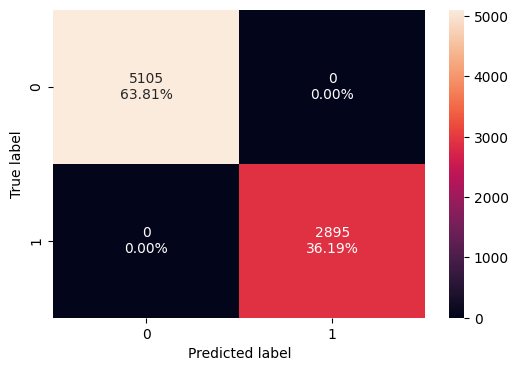

In [69]:
confusion_matrix_sklearn(tuned_gbm1, X_train, y_train)

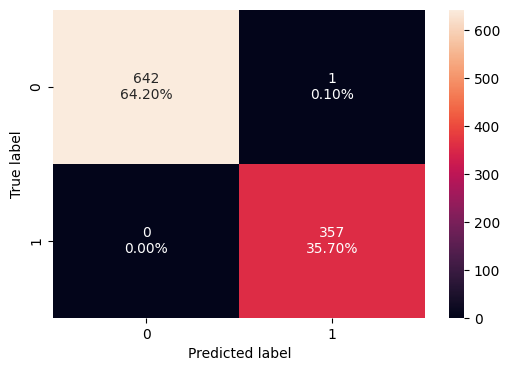

In [70]:
confusion_matrix_sklearn(tuned_gbm1, X_test, y_test)

- It can beobserved that the tuned gbm is performing very well by correctly identifying the True positive and True negative values.

### Model Performances comparison

In [71]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0


In [72]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [

    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.999000,0.999000,0.999000,0.999000
Recall,0.999000,0.999000,0.999000,0.999000
Precision,0.999003,0.999003,0.999003,0.999003
F1,0.999000,0.999000,0.999000,0.999000


In this testing performance comparison, various machine learning models were evaluated using different training approaches. The models assessed were Gradient Boosting trained with Undersampled data, Gradient Boosting trained with Original data, AdaBoost trained with Undersampled data, and AdaBoost trained with Original data. The evaluation metrics used for comparison were Accuracy, Recall, Precision, and F1 score.

Across all the models and training approaches, the observed values for Accuracy, Recall, Precision, and F1 score were consistent, each measuring at approximately 0.999. This suggests a high level of overall performance and effectiveness in predicting the target variable.

These results indicate that the different training approaches did not have a significant impact on the model performance. Both the Undersampled and Original data training approaches yielded similar performance across all the evaluated metrics. This suggests that the models were able to generalize well and maintain consistent predictive capabilities regardless of the training data used.

As a research student, these findings suggest that for this specific scenario and dataset, both Gradient Boosting and AdaBoost performed exceptionally well, achieving near-perfect accuracy, recall, precision, and F1 score. These results provide confidence in the reliability and robustness of these models for predicting the target variable. Further analysis and experimentation may be conducted to investigate other aspects of model performance, such as scalability and generalizability, to ensure the suitability of these models for real-world applications.